In [1]:
import pandas as pd
from pymongo import MongoClient
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Createing the connection to the database part 1
mongo = MongoClient(port=27017)
db = mongo['hockey_project_db']
db.list_collection_names()

['2023-2024', '2022-2023']

In [3]:
#creating connections part 2: putting it into a dataframe
#test and training data
data_2022_2023 = db['2022-2023']
answer_1 = list(data_2022_2023.find({}))
df_2022 = pd.json_normalize(answer_1)

#Validation data
data_2023_2024 = db['2023-2024']
answer_2 = list(data_2023_2024.find({}))
df_2023 = pd.json_normalize(answer_2)

# Exploratory Analysis

In [4]:
df_2022.head()

,_id,playerId,season,name,team,position,situation,games_played,minutes/game,I_F_xOnGoal,...,I_F_lowDangerShots,I_F_mediumDangerShots,I_F_highDangerShots,I_F_lowDangerxGoals,I_F_mediumDangerxGoals,I_F_highDangerxGoals,I_F_lowDangerGoals,I_F_mediumDangerGoals,I_F_highDangerGoals,I_F_unblockedShotAttempts
0,65a5c4b5937234bb37b2f61b,8471817,2022,Ryan Reaves,MIN,R,all,73,9.32,49.47,...,33,29,7,1.16,3.58,1.96,0,4,1,69
1,65a5c4b5937234bb37b2f61c,8480950,2022,Ilya Lyubushkin,BUF,D,all,68,15.01,37.10,...,50,2,0,1.09,0.28,0.00,1,1,0,52
2,65a5c4b5937234bb37b2f61d,8475625,2022,Matt Irwin,WSH,D,all,61,13.04,69.79,...,97,5,0,1.98,0.46,0.00,2,0,0,102
3,65a5c4b5937234bb37b2f61e,8480860,2022,Kevin Bahl,NJD,D,all,42,14.02,32.17,...,46,1,0,1.13,0.08,0.00,1,1,0,47
4,65a5c4b5937234bb37b2f61f,8477952,2022,Robby Fabbri,DET,C,all,28,16.00,39.69,...,29,14,10,1.07,1.73,4.02,1,2,4,53


In [5]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   _id                        774 non-null    object 
 1   playerId                   774 non-null    int64  
 2   season                     774 non-null    int64  
 3   name                       774 non-null    object 
 4   team                       774 non-null    object 
 5   position                   774 non-null    object 
 6   situation                  774 non-null    object 
 7   games_played               774 non-null    int64  
 8   minutes/game               774 non-null    float64
 9   I_F_xOnGoal                774 non-null    float64
 10  I_F_xGoals                 774 non-null    float64
 11  I_F_xRebounds              774 non-null    float64
 12  I_F_primaryAssists         774 non-null    int64  
 13  I_F_secondaryAssists       774 non-null    int64  

In [6]:
df_2022.describe()

,playerId,season,games_played,minutes/game,I_F_xOnGoal,I_F_xGoals,I_F_xRebounds,I_F_primaryAssists,I_F_secondaryAssists,I_F_shotAttempts,...,I_F_lowDangerShots,I_F_mediumDangerShots,I_F_highDangerShots,I_F_lowDangerxGoals,I_F_mediumDangerxGoals,I_F_highDangerxGoals,I_F_lowDangerGoals,I_F_mediumDangerGoals,I_F_highDangerGoals,I_F_unblockedShotAttempts
count,7.740000e+02,774.0,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,...,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000
mean,8.478144e+06,2022.0,60.024548,15.867997,105.790840,10.795116,7.458036,9.896641,7.941860,195.299742,...,103.776486,30.781654,11.366925,3.072468,3.790349,3.932339,3.419897,3.764858,3.405685,145.925065
std,2.680532e+03,0.0,22.527618,3.932092,71.554825,9.449767,5.475903,9.153833,6.812816,127.854099,...,69.132607,28.888511,11.550989,2.183612,3.575374,4.271198,3.552332,4.237027,4.070945,97.519717
min,8.470595e+06,2022.0,10.000000,6.580000,3.210000,0.140000,0.240000,0.000000,0.000000,7.000000,...,2.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,8.476456e+06,2022.0,46.000000,12.782500,51.827500,3.660000,3.362500,3.000000,3.000000,99.000000,...,50.000000,7.000000,2.000000,1.460000,0.850000,0.702500,1.000000,0.000000,0.000000,72.000000
50%,8.478194e+06,2022.0,67.000000,15.925000,91.630000,7.870000,6.200000,7.000000,6.000000,177.000000,...,93.000000,22.000000,7.500000,2.595000,2.705000,2.375000,2.000000,2.000000,2.000000,130.000000
75%,8.480058e+06,2022.0,79.000000,18.690000,144.430000,15.617500,10.247500,14.000000,11.750000,269.000000,...,144.000000,47.000000,17.000000,4.237500,5.927500,5.837500,5.000000,6.000000,5.000000,199.000000
max,8.484125e+06,2022.0,85.000000,26.380000,397.450000,51.190000,31.130000,60.000000,39.000000,728.000000,...,375.000000,157.000000,66.000000,12.250000,19.090000,26.670000,27.000000,25.000000,22.000000,542.000000


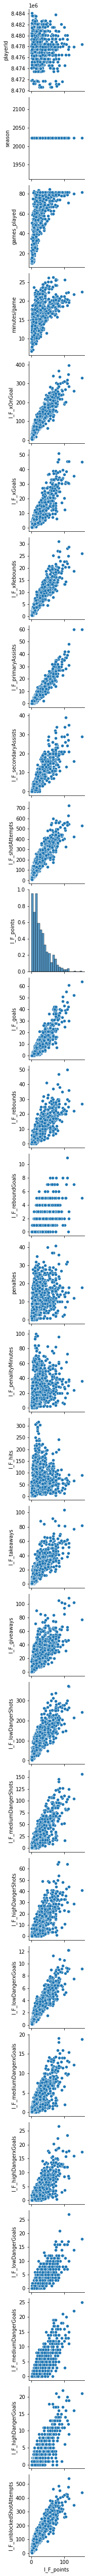

In [7]:
sns.pairplot(data = df_2022,
             x_vars= ['I_F_points'])

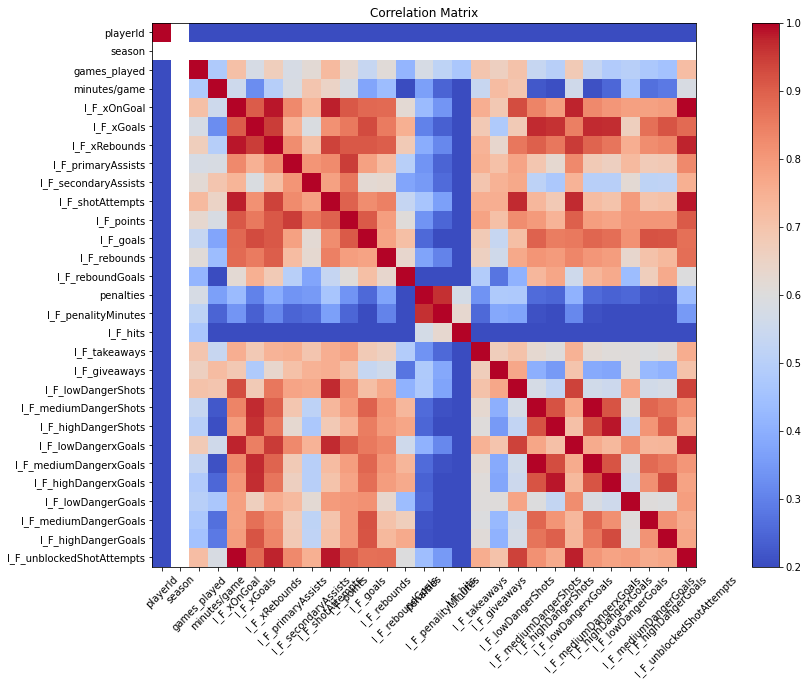

In [8]:
#Create a correlation matrix
corr = df_2022.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(20, 10))
plt.imshow(corr, cmap='coolwarm', vmin=0.2, vmax=1)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlation Matrix')

# Save the figure as an image
plt.savefig('Resources/correlation_matrix_predrop.png')

In [9]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   _id                        811 non-null    object 
 1   playerId                   811 non-null    int64  
 2   season                     811 non-null    int64  
 3   name                       811 non-null    object 
 4   team                       811 non-null    object 
 5   position                   811 non-null    object 
 6   situation                  811 non-null    object 
 7   games_played               811 non-null    int64  
 8   minutes/game               811 non-null    float64
 9   I_F_xOnGoal                811 non-null    float64
 10  I_F_xGoals                 811 non-null    float64
 11  I_F_xRebounds              811 non-null    float64
 12  I_F_primaryAssists         811 non-null    int64  
 13  I_F_secondaryAssists       811 non-null    int64  

# Cleaning the Data via dropping low corelated columns

In [10]:
df_2022.drop(['_id', 'playerId', 'season', 'name', 'team', 'situation', 'position', 'games_played', 'I_F_hits', 'penalties', 'I_F_penalityMinutes', 'I_F_goals', 'I_F_secondaryAssists', 'I_F_primaryAssists', 'I_F_reboundGoals'], axis='columns',inplace=True)
df_2023.drop(['_id', 'playerId', 'season', 'team', 'situation', 'position', 'games_played', 'I_F_hits', 'penalties', 'I_F_penalityMinutes', 'I_F_goals', 'I_F_secondaryAssists', 'I_F_primaryAssists'], axis='columns',inplace=True)

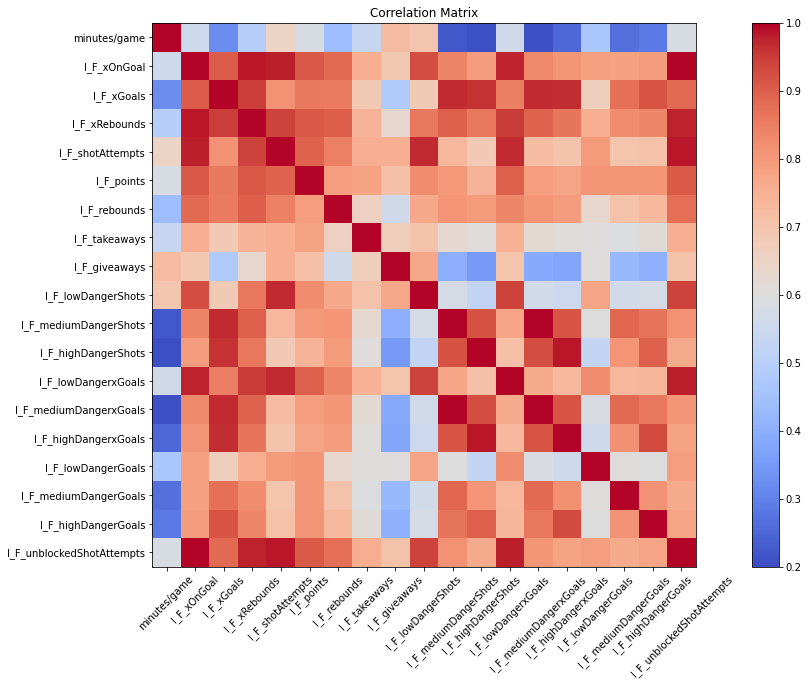

In [11]:
#Create a correlation matrix
corr = df_2022.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(20, 10))
plt.imshow(corr, cmap='coolwarm', vmin=0.2, vmax=1)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlation Matrix')

# Save the figure as an image
plt.savefig('Resources/correlation_matrix_postdrop.png')

In [12]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   minutes/game               774 non-null    float64
 1   I_F_xOnGoal                774 non-null    float64
 2   I_F_xGoals                 774 non-null    float64
 3   I_F_xRebounds              774 non-null    float64
 4   I_F_shotAttempts           774 non-null    int64  
 5   I_F_points                 774 non-null    int64  
 6   I_F_rebounds               774 non-null    int64  
 7   I_F_takeaways              774 non-null    int64  
 8   I_F_giveaways              774 non-null    int64  
 9   I_F_lowDangerShots         774 non-null    int64  
 10  I_F_mediumDangerShots      774 non-null    int64  
 11  I_F_highDangerShots        774 non-null    int64  
 12  I_F_lowDangerxGoals        774 non-null    float64
 13  I_F_mediumDangerxGoals     774 non-null    float64

In [13]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       811 non-null    object 
 1   minutes/game               811 non-null    float64
 2   I_F_xOnGoal                811 non-null    float64
 3   I_F_xGoals                 811 non-null    float64
 4   I_F_xRebounds              811 non-null    float64
 5   I_F_shotAttempts           811 non-null    int64  
 6   I_F_points                 811 non-null    int64  
 7   I_F_rebounds               811 non-null    int64  
 8   I_F_takeaways              811 non-null    int64  
 9   I_F_giveaways              811 non-null    int64  
 10  I_F_lowDangerShots         811 non-null    int64  
 11  I_F_mediumDangerShots      811 non-null    int64  
 12  I_F_highDangerShots        811 non-null    int64  
 13  I_F_lowDangerxGoals        811 non-null    float64

In [ ]:
#Creating the .csvs to be used in the mongoDB df
df_2022.to_csv('data/model_2022-2023.csv')
df_2023.to_csv('data/model_2023-2024.csv')